In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT AND PRE-PROCESS DATA #

In [162]:
df_o = pd.read_csv("../Datasets/moocs23-24.csv")
df_o.head()

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32


In [163]:
len(df_o)

416921

In [164]:
df_o.columns

Index(['Id', 'institute', 'course_id', 'year', 'semester', 'userid_DI',
       'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI',
       'gender', 'grade', 'start_time_DI', 'last_event_DI', 'nevents',
       'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'incomplete_flag', 'age'],
      dtype='object')

In [165]:
df = df_o.copy()

## Check columns for n/a values ##

In [166]:
df.isna().sum()

Id                       0
institute                0
course_id                0
year                     0
semester                 0
userid_DI                0
viewed                   0
explored                 0
certified                0
final_cc_cname_DI        0
LoE_DI                   0
gender               23211
grade                    0
start_time_DI            0
last_event_DI            0
nevents                  0
ndays_act                0
nplay_video              0
nchapters                0
nforum_posts             0
incomplete_flag          0
age                      0
dtype: int64

In [167]:
print("Percentage of entries that lack gender information: ",format(23211/len(df_o)*100, ".2f"), "%")

Percentage of entries that lack gender information:  5.57 %


Because gender is one key feature of this dataset and because it is the only aspect of the dataset that appears to be missing, it makes sense to remove the rows with missing values in order to reduce the amount of "noise" in the data itself.

In [168]:
# Isolate indices of rows with blank values
df[df["gender"].isna()].index

Int64Index([    13,     14,     15,     88,    132,    174,    175,    176,
               177,    404,
            ...
            416725, 416765, 416779, 416786, 416797, 416809, 416814, 416821,
            416822, 416866],
           dtype='int64', length=23211)

In [169]:
# Drop rows
df = df.drop(df[df["gender"].isna()].index)

In [170]:
df.reset_index()

,index,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,416916,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
393706,416917,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
393707,416918,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
393708,416919,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [171]:
len(df)

393710

In [172]:
len(set(df["Id"]))

393487

In [173]:
duplicated_entries = df[df.duplicated(subset=["Id"])]
duplicated_entries

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
786,2022,HarvardX,ER22x,2024,Spring,MHxPC130012400,1,0,0,United States,...,0.0,1/8/2024,3/28/2024,13,3,197757,1,0,0,26
787,2023,HarvardX,PH207x,2023,Fall,MHxPC130012400,1,0,0,United States,...,0.0,7/24/2023,3/16/2024,25,9,1,1,0,0,25
7493,20224,HarvardX,PH207x,2023,Fall,MHxPC130014792,0,0,0,United States,...,0.0,8/12/2023,8/12/2023,4,1,197757,0,0,0,27
7494,20226,HarvardX,CB22x,2024,Spring,MHxPC130262508,1,0,0,Philippines,...,0.0,12/21/2023,4/22/2024,14,1,197757,3,0,0,23
7497,20235,HarvardX,PH207x,2023,Fall,MHxPC130443317,0,0,0,United States,...,0.0,8/12/2023,8/14/2023,3,2,197757,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408066,572023,MITx,8.MReV,2024,Summer,MHxPC130106847,0,0,0,India,...,0.0,8/6/2024,8/6/2024,2,1,197757,0,0,0,25
408067,572024,MITx,6.00x,2024,Spring,MHxPC130450735,1,0,0,Russian Federation,...,0.0,8/3/2024,9/6/2024,740,11,86,4,0,0,31
416180,582022,MITx,6.00x,2024,Spring,MHxPC130551092,0,0,0,United States,...,0.0,9/3/2024,9/3/2024,1,1,197757,0,0,0,20
416181,582023,MITx,6.00x,2024,Spring,MHxPC130130490,0,0,0,Other Africa,...,0.0,9/3/2024,9/3/2024,2,1,197757,0,0,0,30


In [174]:
# for student_id in duplicated_entries["Id"]:
#     print(df[df["Id"]==student_id])

In [175]:
len(set(duplicated_entries["Id"]))

223

In [176]:
set(df["LoE_DI"])

{"Bachelor's", 'Doctorate', 'Less than Secondary', "Master's", 'Secondary'}

In [177]:
set(df["final_cc_cname_DI"])

{'Australia',
 'Bangladesh',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'India',
 'Indonesia',
 'Japan',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Other Africa',
 'Other East Asia',
 'Other Europe',
 'Other Middle East/Central Asia',
 'Other North & Central Amer., Caribbean',
 'Other Oceania',
 'Other South America',
 'Other South Asia',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Russian Federation',
 'Spain',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Unknown/Other'}

<AxesSubplot:xlabel='final_cc_cname_DI', ylabel='Count'>

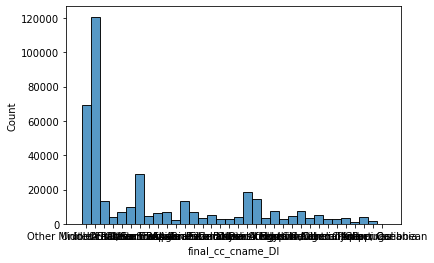

In [178]:
sns.histplot(df["final_cc_cname_DI"])

<AxesSubplot:xlabel='age', ylabel='Count'>

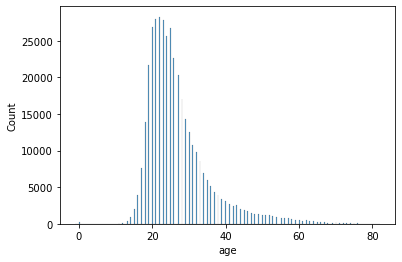

In [179]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='course_id', ylabel='Count'>

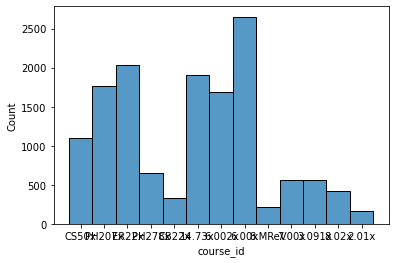

In [202]:
sns.histplot(df[df["certified"]==1], x="course_id")

In [199]:
df[df["certified"]==1]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
25,51,HarvardX,CS50x,MHxPC130320562,1,Other Europe,Master's,29,1,1,...,0,0,0,0,0,0,0,0,0,0
123,290,HarvardX,CS50x,MHxPC130574671,1,Egypt,Secondary,17,1,0,...,0,0,0,0,0,0,0,0,0,0
206,487,HarvardX,CS50x,MHxPC130158860,1,India,Bachelor's,21,1,1,...,0,0,0,0,0,0,0,0,0,0
215,507,HarvardX,CS50x,MHxPC130153716,1,Pakistan,Bachelor's,21,1,1,...,1,0,0,0,0,0,0,0,0,0
229,536,HarvardX,CS50x,MHxPC130285816,1,Russian Federation,Secondary,28,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406080,569637,MITx,8.MReV,MHxPC130141567,1,Indonesia,Secondary,16,0,0,...,0,0,0,0,0,0,0,0,0,0
406089,569647,MITx,8.MReV,MHxPC130016604,1,Other South Asia,Secondary,17,1,0,...,0,0,0,0,0,0,0,0,0,0
406129,569691,MITx,8.MReV,MHxPC130175757,1,India,Secondary,21,1,1,...,0,0,0,0,0,0,0,0,0,0
406516,570147,MITx,8.MReV,MHxPC130418138,1,India,Less than Secondary,16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
df = df.drop(["year", "semester", "start_time_DI", "last_event_DI","viewed","grade","start_time_DI","explored","last_event_DI","nevents","ndays_act","nplay_video", "nchapters", "nforum_posts","incomplete_flag"], axis=1)

In [181]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,gender,age
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,m,23
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,m,19
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,m,24
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,m,20
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,f,32
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,m,24
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,m,22
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,f,22
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,m,34


# TRANSFORM CATEGORIAL INFORMATION TO ONE-HOT ENCODING #

## GENDER ##

In [182]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

df["gender_numerical"] = df["gender"].apply(lambda x: 1 if x=='m' else 0)

In [183]:
df = df.drop(["gender"], axis=1)

In [184]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,24,1
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,22,1
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,22,0
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,34,1


## AGE ##

In [185]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
# Set age brackets
df["age_indicator"] = df["age"].apply(lambda x: 0 if x<=17 else (
                                                        1 if x>17 and x<=35 else (
                                                        2 if x>35 and x<60 else 4)))

In [186]:
# Produce age dummies
age_dummies = pd.get_dummies(df["age_indicator"], prefix="age_indicator")
age_dummies

,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
416916,0,1,0,0
416917,0,1,0,0
416918,0,1,0,0
416919,0,1,0,0


In [187]:
# Concatenate dummies to original df
df = pd.concat([df, age_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0


## LEVEL OF EDUCATION ##

In [188]:
# Generate dummies
LoE_dummies = pd.get_dummies(df["LoE_DI"], prefix="education")
LoE_dummies

,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
416916,0,0,0,1,0
416917,1,0,0,0,0
416918,1,0,0,0,0
416919,0,1,0,0,0


In [189]:
# # Concatenate educational econding to original df
df = pd.concat([df, LoE_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0,1,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0,0,0,0,0,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0,1,0,0,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0,0,0,0,0,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0,0,0,0,1,0


## REGIONAL INFORMATION ##

In [190]:
# Get regional information dummies
reg_dummies = pd.get_dummies(df["final_cc_cname_DI"], prefix="region")
reg_dummies

,region_Australia,region_Bangladesh,region_Brazil,region_Canada,region_China,region_Colombia,region_Egypt,region_France,region_Germany,region_Greece,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416916,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
416917,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
# # Concatenate regional econding to original df
df = pd.concat([df, reg_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,...,0,0,0,0,0,0,0,0,0,0


## DROP ORIGINAL COLUMNS ##

In [192]:
# df_final = pd.concat([df, age_dummies, LoE_dummies, reg_dummies], axis=1)

In [193]:
# df_final

In [194]:
# # Make a copy of the processed dataset before dropping columns
df_final = df.copy()

In [195]:
df_final = df_final.drop(["final_cc_cname_DI", "LoE_DI","age","age_indicator"], axis=1)

In [196]:
df_final.head()

,Id,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_final.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russi

# TRAIN-TEST SPLIT #

In [203]:
from sklearn.model_selection import train_test_split

In [248]:
# Split into training and testing data
# I am not filtering out users who are taking multiple courses because those themselves would give us an opportunity to see whether users are matched/clustered correctly

train_df_o, test_df_o = train_test_split(df, test_size=0.2, random_state=7,stratify=df["course_id"])

In [254]:
len(train_df_o)

314968

In [255]:
len(test_df_o)

78742

In [256]:
len(test_df_o["userid_DI"].unique())

74841

In [257]:
# isolate which user id is not unique
test_df_o[test_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
377707,539645,MITx,6.00x,MHxPC130211185,0,Other Africa,Secondary,26,1,1,...,0,0,0,0,0,0,0,0,0,0
364805,526402,MITx,6.002x,MHxPC130514657,0,Portugal,Secondary,20,1,1,...,0,0,0,1,0,0,0,0,0,0
71103,183377,HarvardX,PH278x,MHxPC130143930,0,Other Middle East/Central Asia,Bachelor's,28,0,1,...,0,0,0,0,0,0,0,0,0,0
83504,209060,HarvardX,ER22x,MHxPC130187514,0,Other Europe,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
92604,224036,HarvardX,ER22x,MHxPC130120756,0,Other Europe,Doctorate,31,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15744,45615,HarvardX,CS50x,MHxPC130592584,0,Other Europe,Master's,31,1,1,...,0,0,0,0,0,0,0,0,0,0
15081,43544,HarvardX,CB22x,MHxPC130149513,0,India,Secondary,22,0,1,...,0,0,0,0,0,0,0,0,0,0
304883,457684,MITx,6.002x,MHxPC130301752,1,Other Europe,Master's,27,1,1,...,0,0,0,0,0,0,0,0,0,0
288856,440721,MITx,6.002x,MHxPC130043569,0,Other Middle East/Central Asia,Bachelor's,28,1,1,...,0,0,0,0,0,0,0,0,0,0


In [258]:
train_df_o[train_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
85783,213290,HarvardX,CB22x,MHxPC130047152,0,Unknown/Other,Secondary,25,1,1,...,0,0,0,0,0,0,0,0,0,1
177733,319924,MITx,6.00x,MHxPC130289074,0,"Other North & Central Amer., Caribbean",Secondary,23,1,1,...,0,0,0,0,0,0,0,0,0,0
43845,119512,HarvardX,PH278x,MHxPC130374631,0,United States,Bachelor's,27,0,1,...,0,0,0,0,0,0,0,0,1,0
358288,518966,MITx,8.02x,MHxPC130187664,0,Brazil,Secondary,27,1,1,...,0,0,0,0,0,0,0,0,0,0
204735,349546,MITx,8.02x,MHxPC130592811,0,India,Secondary,21,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316747,470567,MITx,14.73x,MHxPC130448406,0,Other Europe,Secondary,25,0,1,...,0,0,0,0,0,0,0,0,0,0
79772,201404,HarvardX,CB22x,MHxPC130462452,0,United States,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,1,0
192915,336496,MITx,6.00x,MHxPC130014017,0,United States,Bachelor's,24,0,1,...,0,0,0,0,0,0,0,0,1,0
86271,214176,HarvardX,ER22x,MHxPC130004533,0,Brazil,Secondary,24,1,1,...,0,0,0,0,0,0,0,0,0,0


In [259]:
overlap_users = []

a = set(test_df_o["userid_DI"])
b = set(train_df_o["userid_DI"])

for userid in a:
    if userid in b:
        overlap_users.append(userid)
        
len(overlap_users)

20487

In [260]:
overlap_users

['MHxPC130093892',
 'MHxPC130044827',
 'MHxPC130487170',
 'MHxPC130273827',
 'MHxPC130160821',
 'MHxPC130060238',
 'MHxPC130275310',
 'MHxPC130073809',
 'MHxPC130570737',
 'MHxPC130057145',
 'MHxPC130150395',
 'MHxPC130179018',
 'MHxPC130431991',
 'MHxPC130076489',
 'MHxPC130389487',
 'MHxPC130367661',
 'MHxPC130413542',
 'MHxPC130013126',
 'MHxPC130072041',
 'MHxPC130488210',
 'MHxPC130406556',
 'MHxPC130172864',
 'MHxPC130148345',
 'MHxPC130263981',
 'MHxPC130311951',
 'MHxPC130512931',
 'MHxPC130338387',
 'MHxPC130400229',
 'MHxPC130041725',
 'MHxPC130561409',
 'MHxPC130586567',
 'MHxPC130435579',
 'MHxPC130423075',
 'MHxPC130476167',
 'MHxPC130214177',
 'MHxPC130482494',
 'MHxPC130232154',
 'MHxPC130236577',
 'MHxPC130409486',
 'MHxPC130160595',
 'MHxPC130227455',
 'MHxPC130238390',
 'MHxPC130052858',
 'MHxPC130192825',
 'MHxPC130589314',
 'MHxPC130468353',
 'MHxPC130232187',
 'MHxPC130527632',
 'MHxPC130363754',
 'MHxPC130018666',
 'MHxPC130439042',
 'MHxPC130328065',
 'MHxPC13004

In [262]:
overlap_users2 = [user_id for user_id in a if user_id in b]

In [263]:
len(overlap_users2)

20487

In [264]:
# https://stackoverflow.com/questions/3170055/test-if-lists-share-any-items-in-python
# bool(set(test_df["userid_DI"]) & set(train_df["userid_DI"]))
# any(i in set(test_df["userid_DI"]) for i in set(train_df["userid_DI"]))

## K-means clustering ##

In [286]:
# K-means clustering
# https://lisalondon.medium.com/applying-k-means-clustering-model-to-customer-segmentation-4254386c7563
# https://www.youtube.com/watch?v=afPJeQuVeuY
# https://www.youtube.com/watch?v=ZzJ13-6kCAY
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb


# perhaps think about number of clusters in relation to size of the dataset, such that each cluster has a certain number
#  of users. perhaps this measure as a way of delineating the values of k that will be tested

In [310]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [281]:
train_df = train_df_o.copy()

In [282]:
train_df.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'age', 'gender_numerical',
       'age_indicator', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippi

In [283]:
# ??????????????????????? consider if to remove certified ???????????????????????
# afterthought: remove certified because it is not something that would belong to a new user
#    --> the certified element should come into play when sorting recommendations and should be part of those functions
train_df = train_df.drop(["Id", "institute","course_id", "userid_DI","certified","final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1)

In [284]:
train_df.columns

Index(['gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Federation', 'region_Spain',
       'region_Ukraine', 'region_

In [285]:
train_df

,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
172274,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
123079,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117245,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53223,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
349370,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178860,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
130707,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129481,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
# useless given 0s and 1s

# sns.pairplot(train_df)

## Elbow Method ##

In [307]:
max_k = 100
min_k = 5
inertia = []
k_values = range(min_k, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7, max_iter=1000)
    
    kmeans.fit_predict(train_df)
    inertia.append(kmeans.inertia_)



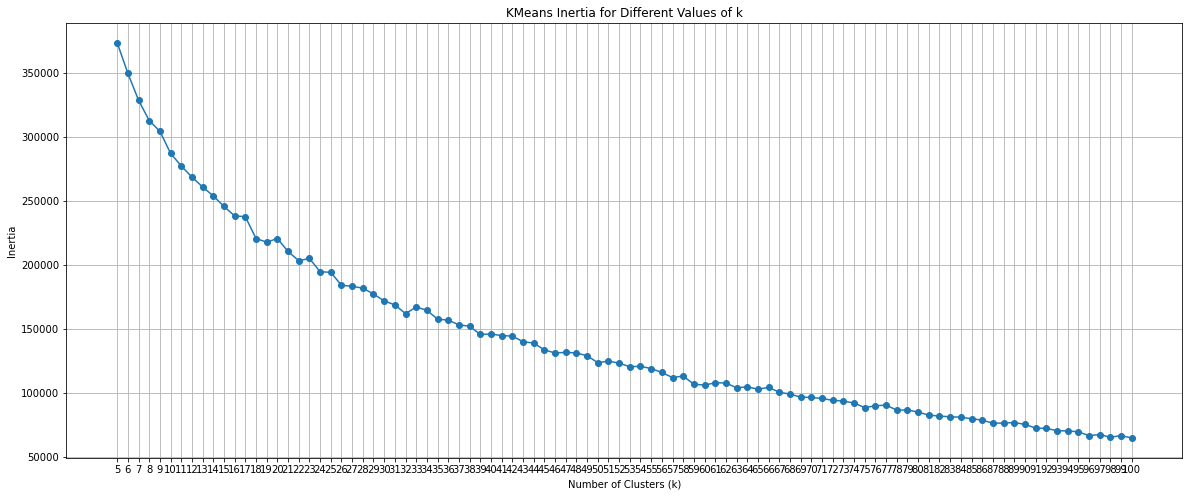

In [309]:
# 5<=k<=100

# plt.figure(figsize=(20,8))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

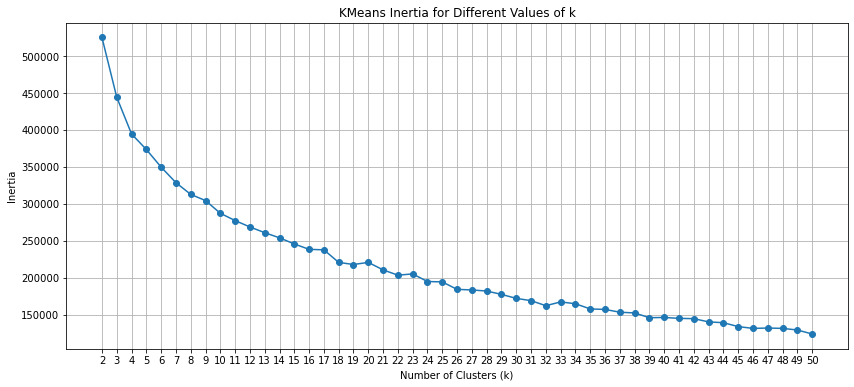

In [305]:
# 2<=k<=50

# plt.figure(figsize=(14,6))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

## Elbow + Silhouette Score ##

In [312]:
# max_k = 100
# min_k = 5
# inertia = []
# silhouette_scores = []
# k_values = range(min_k, max_k+1)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=7, max_iter=1000) 
    
#     cluster_labels = kmeans.fit_predict(train_df)
    
#     sil_score = silhouette_score(train_df, cluster_labels)
    
#     silhouette_scores.append(sil_score)
#     inertia.append(kmeans.inertia_)



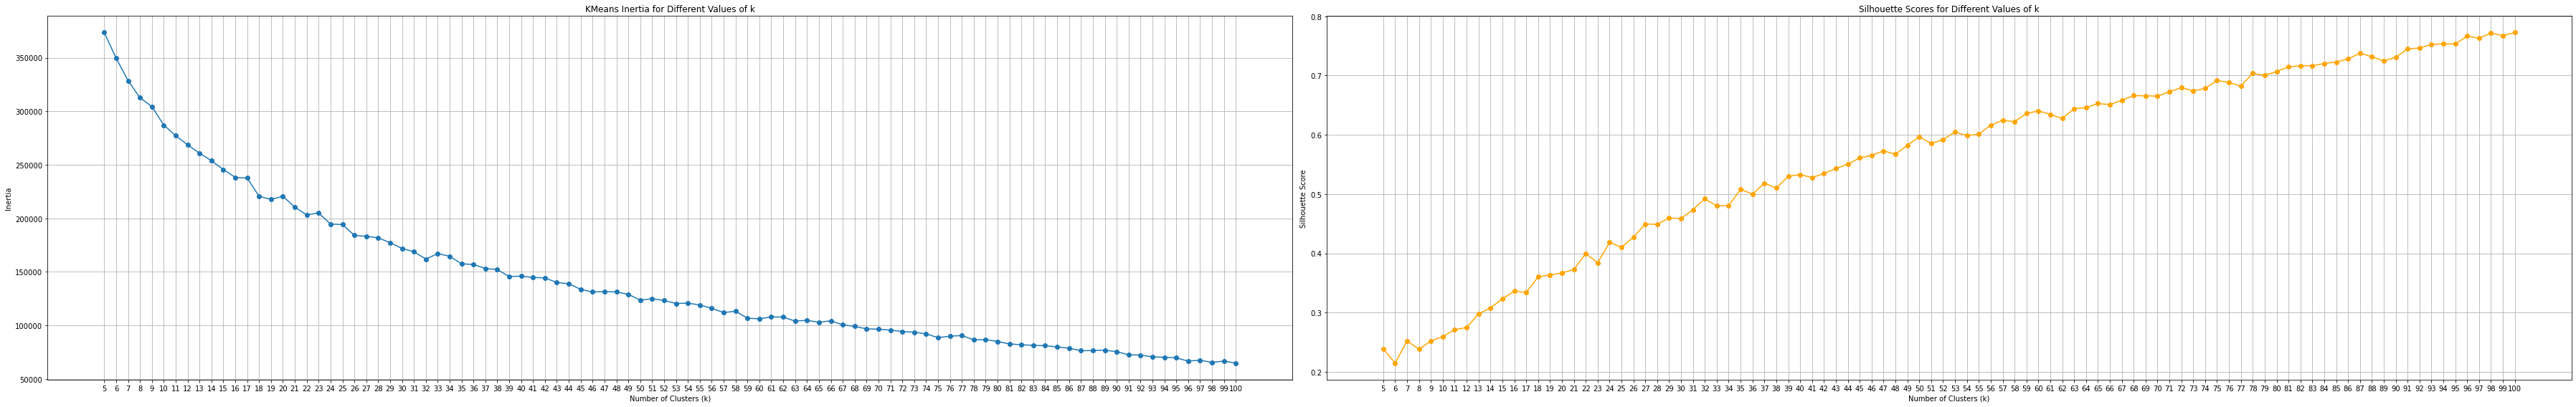

In [315]:
plt.figure(figsize=(50,8))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color="orange")
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

## Increase Cluster Numbers ##

In [316]:
max_k = 120
min_k = 101
inertia_2 = []
silhouette_scores_2 = []
k_values_2 = range(min_k, max_k+1)

for k in k_values_2:
    kmeans2 = KMeans(n_clusters=k, random_state=7) 
    
    cluster_labels_2 = kmeans.fit_predict(train_df)
    
    sil_score_2 = silhouette_score(train_df, cluster_labels)
    
    silhouette_scores_2.append(sil_score)
    inertia_2.append(kmeans.inertia_)



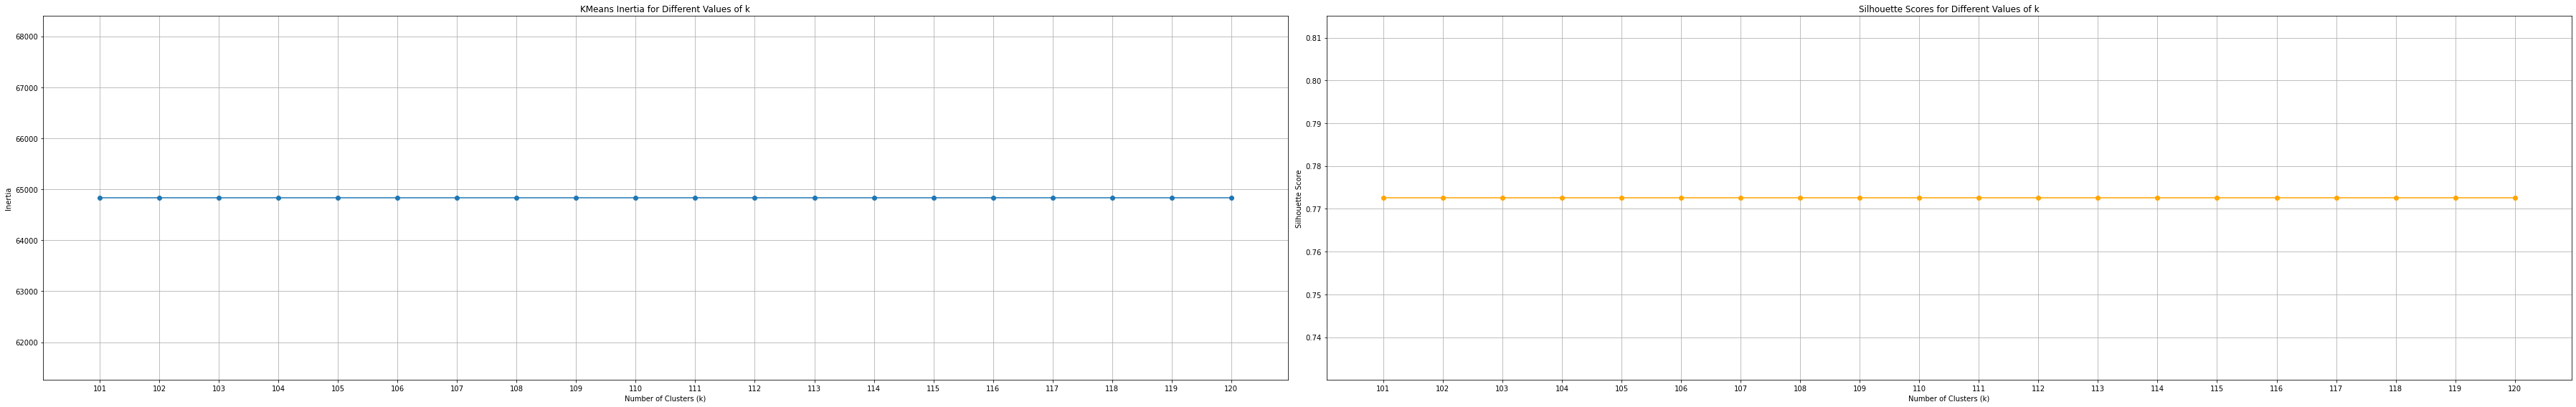

In [317]:
plt.figure(figsize=(50,8))

plt.subplot(1,2,1)
plt.plot(k_values_2, inertia_2, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values_2)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values_2, silhouette_scores_2, marker='o', color="orange")
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values_2)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 1) use k parameter to generate cluster lables
# 2) add cluster labels to dataset

In [318]:
max_k = 150
min_k = 121
inertia_3 = []
silhouette_scores_3 = []
k_values_3 = range(min_k, max_k+1)

for k in k_values_3:
    kmeans3 = KMeans(n_clusters=k, random_state=7) 
    
    cluster_labels_3 = kmeans.fit_predict(train_df)
    
    sil_score_3 = silhouette_score(train_df, cluster_labels)
    
    silhouette_scores_3.append(sil_score)
    inertia_3.append(kmeans.inertia_)

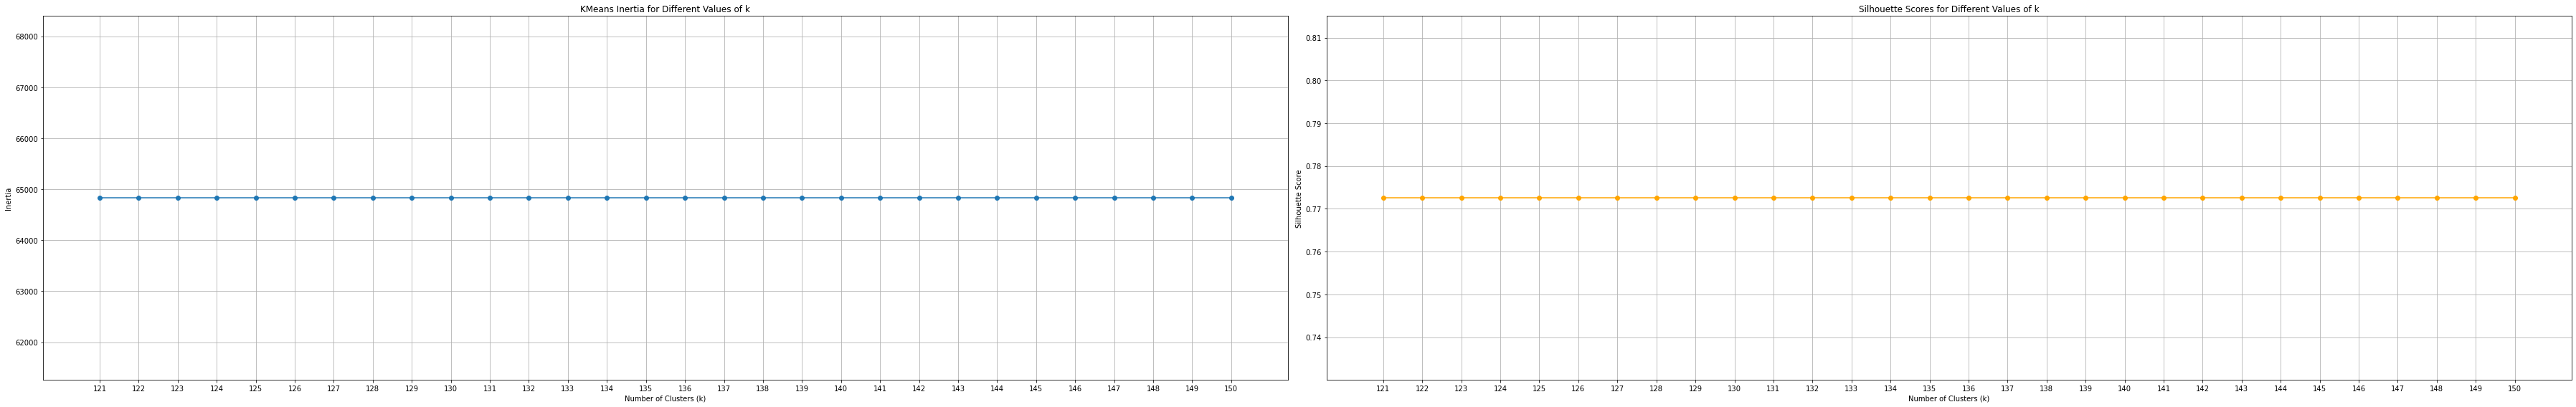

In [319]:
plt.figure(figsize=(50,8))

plt.subplot(1,2,1)
plt.plot(k_values_3, inertia_3, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values_3)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values_3, silhouette_scores_3, marker='o', color="orange")
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values_3)
plt.grid(True)

plt.tight_layout()
plt.show()

## Get prediction on test data ##

In [ ]:
test_df = test_df_o.copy()

In [ ]:
test_df = train_df.drop(["Id", "institute","course_id", "userid_DI","certified","final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1)

In [ ]:
predicted_labels = kmeans.predict(test_df)

In [ ]:
# Check distance of test case to cluster centre:
# https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster

In [ ]:
# create pivot